# **Importing All libraries******

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
from geopy.geocoders import Nominatim# module to convert an address into latitude and longitude values
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import pandas as pd
from pandas.io.json import json_normalize
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML
from pandas.io.json import json_normalize
import folium # plotting library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Client ID info for Foursquare

In [2]:
CLIENT_ID = 'KJILOVWXJS1ULPC0VURUALFW1S2ETMZEIMQNNO0MO2DRWDHQ' # your Foursquare ID
CLIENT_SECRET = 'BOCPEBHOG1LATUFM5K3UGIDJQT4C4EJFL4HP4NSO41ANVDNP' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 3000

# CREATING SEARCH FOR FRIED CHICKEN IN FOURSQUARE

In [114]:
lat=28.6139 
lng=77.2090
radius= 100000
search_query = 'Chinese'

In [115]:
url='https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query={}'.format(CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,search_query)


In [116]:
results = requests.get(url).json()
results


{'meta': {'code': 200, 'requestId': '5f1ffefa3ab3975ba8cd2a09'},
 'response': {'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_',
       'suffix': '.png'},
      'id': '4bf58dd8d48988d145941735',
      'name': 'Chinese Restaurant',
      'pluralName': 'Chinese Restaurants',
      'primary': True,
      'shortName': 'Chinese'}],
    'hasPerk': False,
    'id': '4bfff9e8ca1920a1579bed81',
    'location': {'address': 'F-14/15, Middle Circle, Connaught Place',
     'cc': 'IN',
     'city': 'New Delhi',
     'country': 'India',
     'distance': 2177,
     'formattedAddress': ['F-14/15, Middle Circle, Connaught Place',
      'New Delhi',
      'Delhi',
      'India'],
     'labeledLatLngs': [{'label': 'display',
       'lat': 28.63059319420659,
       'lng': 77.22061837514777}],
     'lat': 28.63059319420659,
     'lng': 77.22061837514777,
     'state': 'Delhi'},
    'name': 'The Chinese',
    'referralId': 'v-1595932630'},
   {'categories': 

# NORMALIZING AND PUTTING ALL REQUESTS IN A DATAFRAME

In [117]:
Data=json_normalize(results['response']['venues'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


In [118]:
a=Data['categories']

# **GETING THE CATEGORY FROM THE RESULTS**

In [119]:
def getCategory(s):          
    Cat=[]
    for i,d in enumerate(s):
        if(len(d)>0) :
            Cat.append(d[0]['name'])
        else :
            Cat.append('null')
    return Cat

In [120]:
CatS=getCategory(a)

In [121]:
Data['Category']=CatS

# CHOOSING NECESSARY COLUMNS

In [122]:
FinalData=Data.loc[:,['name','location.lat','location.lng','Category']]
FinalData

,name,location.lat,location.lng,Category
0,The Chinese,28.630593,77.220618,Chinese Restaurant
1,Fujiya Japanese n Chinese restaurant,28.623762,77.199564,Asian Restaurant
2,Chinese Bite,28.584280,77.191714,Chinese Restaurant
3,"Chinese Garden, Yashwant Place",28.584106,77.191610,Restaurant
4,Chinese corner,28.642798,77.186733,Chinese Restaurant
5,"Zen Chinese, Connaught Place",28.633658,77.219495,Chinese Restaurant
6,Soy So Chinese,28.600367,77.226541,Indian Restaurant
7,Chinese Hut,28.583872,77.243970,College Administrative Building
8,Pioneer - The Chinese Restaurant,28.634521,77.216965,Chinese Restaurant
9,Chinese Food Truck,28.573822,77.230139,Food Truck


# DISPLAYING MAP OF ALL RESTURANTS

In [123]:
map_Delhi = folium.Map(location=[lat,lng], zoom_start=11)

# add markers to map
for lat, lng, label in zip(FinalData['location.lat'], FinalData['location.lng'], FinalData['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Delhi)  
    
map_Delhi

# FEEDING LAT/LON INFO INTO ZOMATO API TO GET RELEVANT RATINGS AND PRICE FOR RESTURANTS

In [124]:
#curl -X GET --header "Accept: application/json" --header "user-key: 0a04b7aaf0448250b4f4951b04ceb01b" "https://developers.zomato.com/api/v2.1/categories"
headers = {'user-key': '0a04b7aaf0448250b4f4951b04ceb01b'}
venues_information = []

for lat,lng,name in zip(FinalData['location.lat'], FinalData['location.lng'],FinalData['name']):
    print("Fetching data for venue: \n")
    venue = []
    url = ('https://developers.zomato.com/api/v2.1/search?q={}' + 
          '&start=0&lat={}&lon={}').format(name,lat,lng)
    result = requests.get(url, headers = headers).json()
    venue.append(result['restaurants'][0]['restaurant']['name'])
    venue.append(result['restaurants'][0]['restaurant']['location']['latitude'])
    venue.append(result['restaurants'][0]['restaurant']['location']['longitude'])
    venue.append(result['restaurants'][0]['restaurant']['average_cost_for_two'])
    venue.append(result['restaurants'][0]['restaurant']['price_range'])
    venue.append(result['restaurants'][0]['restaurant']['user_rating']['aggregate_rating'])
    venue.append(result['restaurants'][0]['restaurant']['location']['address'])
    venues_information.append(venue)
    

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

Fetching data for venue: 

F

# ****CONVERTING ZOMATO INFO INTO DATAFRAME***

In [125]:
Data=pd.DataFrame(venues_information)

# RENAMING COLUMNS IN ZOMATO API RESULT DATAFRAME

In [126]:
Data.columns=['name1','location.lat1','location.lng1','AvgCostfor2','PriceRange','AverageUserRating','Address']

In [127]:
Data


,name1,location.lat1,location.lng1,AvgCostfor2,PriceRange,AverageUserRating,Address
0,Kinbuck 2,28.6321597190,77.2166951001,1500,3,4.1,"P-10/90, 1st & 2nd Floor, Outer Circle, Connau..."
1,Fujiya,28.6015914075,77.1860203519,1500,3,4.0,"12/48, Malcha Marg Market, Chanakyapuri, New D..."
2,Chinese Bite,28.5842797140,77.1916550025,750,2,3.1,"12 & 13, Yashwant Place Commercial Complex, Ch..."
3,China Garden,28.6340639657,77.2172831744,1900,3,4.2,"G 4/5/6, Marina Arcade, Connaught Place, New D..."
4,Chinese Corner,28.6405233153,77.1846685186,250,1,3.0,"Near Safal Pure Veg, Old Rajinder Nagar, New D..."
5,Zen,28.6343029136,77.2193112597,1600,3,3.5,"B-25, Connaught Place, New Delhi"
6,Oh So Stoned!,28.5673629837,77.3211758584,400,1,4.0,"4th Floor, DLF Mall of India, Sector 18, Noida"
7,The Chinese Hut,28.6533996311,77.2729292884,300,1,3.5,"M-134, Jagat Ram Park, Laxmi Nagar, New Delhi"
8,The Chinese & Thai Restaurant,28.5614604055,77.1928516030,350,1,3.9,"85-B, Humayunpur, Safdarjung, New Delhi"
9,Kinbuck 2,28.6321597190,77.2166951001,1500,3,4.1,"P-10/90, 1st & 2nd Floor, Outer Circle, Connau..."


In [128]:
FinalData

,name,location.lat,location.lng,Category
0,The Chinese,28.630593,77.220618,Chinese Restaurant
1,Fujiya Japanese n Chinese restaurant,28.623762,77.199564,Asian Restaurant
2,Chinese Bite,28.584280,77.191714,Chinese Restaurant
3,"Chinese Garden, Yashwant Place",28.584106,77.191610,Restaurant
4,Chinese corner,28.642798,77.186733,Chinese Restaurant
5,"Zen Chinese, Connaught Place",28.633658,77.219495,Chinese Restaurant
6,Soy So Chinese,28.600367,77.226541,Indian Restaurant
7,Chinese Hut,28.583872,77.243970,College Administrative Building
8,Pioneer - The Chinese Restaurant,28.634521,77.216965,Chinese Restaurant
9,Chinese Food Truck,28.573822,77.230139,Food Truck


# CONCATING BOTH DATAS INTO SINGLE DATAFRAME

In [129]:
DataMerged=pd.concat([Data,FinalData],axis=1)

# DROPPING DUPLICATES IN DATA FRAME SINCE SOME SEEM REDUNDANT

In [130]:
DataMerged.drop_duplicates(subset='Address',inplace=True)

In [131]:
DataMerged.reset_index(drop=True,inplace=True)

In [132]:
DataMerged.drop(['name1'],axis=1,inplace=True)

In [133]:
DataMerged.drop(['location.lat1','location.lng1'],axis=1,inplace=True)

In [134]:
DataMerged.drop(['Address'],axis=1,inplace=True)

In [135]:
DataMerged

,AvgCostfor2,PriceRange,AverageUserRating,name,location.lat,location.lng,Category
0,1500,3,4.1,The Chinese,28.630593,77.220618,Chinese Restaurant
1,1500,3,4.0,Fujiya Japanese n Chinese restaurant,28.623762,77.199564,Asian Restaurant
2,750,2,3.1,Chinese Bite,28.584280,77.191714,Chinese Restaurant
3,1900,3,4.2,"Chinese Garden, Yashwant Place",28.584106,77.191610,Restaurant
4,250,1,3.0,Chinese corner,28.642798,77.186733,Chinese Restaurant
5,1600,3,3.5,"Zen Chinese, Connaught Place",28.633658,77.219495,Chinese Restaurant
6,400,1,4.0,Soy So Chinese,28.600367,77.226541,Indian Restaurant
7,300,1,3.5,Chinese Hut,28.583872,77.243970,College Administrative Building
8,350,1,3.9,Pioneer - The Chinese Restaurant,28.634521,77.216965,Chinese Restaurant
9,300,1,3.2,Chinese Inn,28.649473,77.267306,Chinese Restaurant


In [136]:
map_Delhi1 = folium.Map(location=[lat,lng], zoom_start=11)

# add markers to map
for lat, lng, label in zip(DataMerged['location.lat'], DataMerged['location.lng'], DataMerged['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Delhi1)  
    
map_Delhi1

In [137]:
DataMerged

,AvgCostfor2,PriceRange,AverageUserRating,name,location.lat,location.lng,Category
0,1500,3,4.1,The Chinese,28.630593,77.220618,Chinese Restaurant
1,1500,3,4.0,Fujiya Japanese n Chinese restaurant,28.623762,77.199564,Asian Restaurant
2,750,2,3.1,Chinese Bite,28.584280,77.191714,Chinese Restaurant
3,1900,3,4.2,"Chinese Garden, Yashwant Place",28.584106,77.191610,Restaurant
4,250,1,3.0,Chinese corner,28.642798,77.186733,Chinese Restaurant
5,1600,3,3.5,"Zen Chinese, Connaught Place",28.633658,77.219495,Chinese Restaurant
6,400,1,4.0,Soy So Chinese,28.600367,77.226541,Indian Restaurant
7,300,1,3.5,Chinese Hut,28.583872,77.243970,College Administrative Building
8,350,1,3.9,Pioneer - The Chinese Restaurant,28.634521,77.216965,Chinese Restaurant
9,300,1,3.2,Chinese Inn,28.649473,77.267306,Chinese Restaurant


In [138]:
DataMerged.dtypes

AvgCostfor2            int64
PriceRange             int64
AverageUserRating     object
name                  object
location.lat         float64
location.lng         float64
Category              object
dtype: object

**CONVERTING OBJECTS TO FLOAT******

In [139]:
DataMerged['AverageUserRating']=DataMerged['AverageUserRating'].map(lambda x: float(x))
DataMerged['PriceRange']=DataMerged['PriceRange'].map(lambda x: float(x))
DataMerged['PriceRange']=DataMerged['PriceRange'].map(lambda x: float(x))

In [140]:
DataMerged.dtypes

AvgCostfor2            int64
PriceRange           float64
AverageUserRating    float64
name                  object
location.lat         float64
location.lng         float64
Category              object
dtype: object

**ONE HOT ENCODING CATEGORIES**

In [141]:
DataTo=pd.concat([pd.get_dummies(DataMerged['Category']),DataMerged],axis=1)

In [142]:
DataTo.drop(['Category'],axis=1,inplace=True)

In [143]:
DataTo.drop(['name'],axis=1,inplace=True)

In [144]:
DataTo

,Asian Restaurant,Bakery,Bar,Chinese Restaurant,College Administrative Building,College Cafeteria,Food Truck,Indian Chinese Restaurant,Indian Restaurant,Restaurant,AvgCostfor2,PriceRange,AverageUserRating,location.lat,location.lng
0,0,0,0,1,0,0,0,0,0,0,1500,3.0,4.1,28.630593,77.220618
1,1,0,0,0,0,0,0,0,0,0,1500,3.0,4.0,28.623762,77.199564
2,0,0,0,1,0,0,0,0,0,0,750,2.0,3.1,28.584280,77.191714
3,0,0,0,0,0,0,0,0,0,1,1900,3.0,4.2,28.584106,77.191610
4,0,0,0,1,0,0,0,0,0,0,250,1.0,3.0,28.642798,77.186733
5,0,0,0,1,0,0,0,0,0,0,1600,3.0,3.5,28.633658,77.219495
6,0,0,0,0,0,0,0,0,1,0,400,1.0,4.0,28.600367,77.226541
7,0,0,0,0,1,0,0,0,0,0,300,1.0,3.5,28.583872,77.243970
8,0,0,0,1,0,0,0,0,0,0,350,1.0,3.9,28.634521,77.216965
9,0,0,0,1,0,0,0,0,0,0,300,1.0,3.2,28.649473,77.267306


# GROUPING CATEOGORIES TO SEE THE ONES WITH THE HIGHEST FREQUENCY

In [145]:

a=DataMerged.groupby('Category')['Category'].count()

a

Category
Asian Restaurant                    1
Bakery                              1
Bar                                 1
Chinese Restaurant                 18
College Administrative Building     1
College Cafeteria                   1
Food Truck                          2
Indian Chinese Restaurant           1
Indian Restaurant                   1
Restaurant                          1
Name: Category, dtype: int64

# CHOOSING CATEGORIES WHICH HAVE MORE THAN 2 INSTANCES OR NOT NULL

In [163]:
b=[]
d=[]
DataMerged['Bool']=0
c=a.index
for i,j in zip(a,c):
    if (i >1 ) and (j != 'null'):
        b.append(j)
for i,k in enumerate(DataMerged['Category']) :
    for j in b:
        if k == j :
            DataMerged['Bool'].iloc[i] =True            
             
for k,i in enumerate(DataMerged['Bool']):
    if i == 0:
        DataMerged['Bool'].iloc[k] = False
        

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [164]:
DataMerged['Category'].loc[DataMerged['Bool'] == True]


0     Chinese Restaurant
2     Chinese Restaurant
4     Chinese Restaurant
5     Chinese Restaurant
8     Chinese Restaurant
9     Chinese Restaurant
10    Chinese Restaurant
11    Chinese Restaurant
12    Chinese Restaurant
13    Chinese Restaurant
14            Food Truck
15    Chinese Restaurant
17    Chinese Restaurant
18    Chinese Restaurant
19    Chinese Restaurant
20    Chinese Restaurant
22    Chinese Restaurant
23            Food Truck
24    Chinese Restaurant
25    Chinese Restaurant
Name: Category, dtype: object

# PLOTTING AVG USER RATING AND AVG COST FOR 2 AGAINST CATEGORIES


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


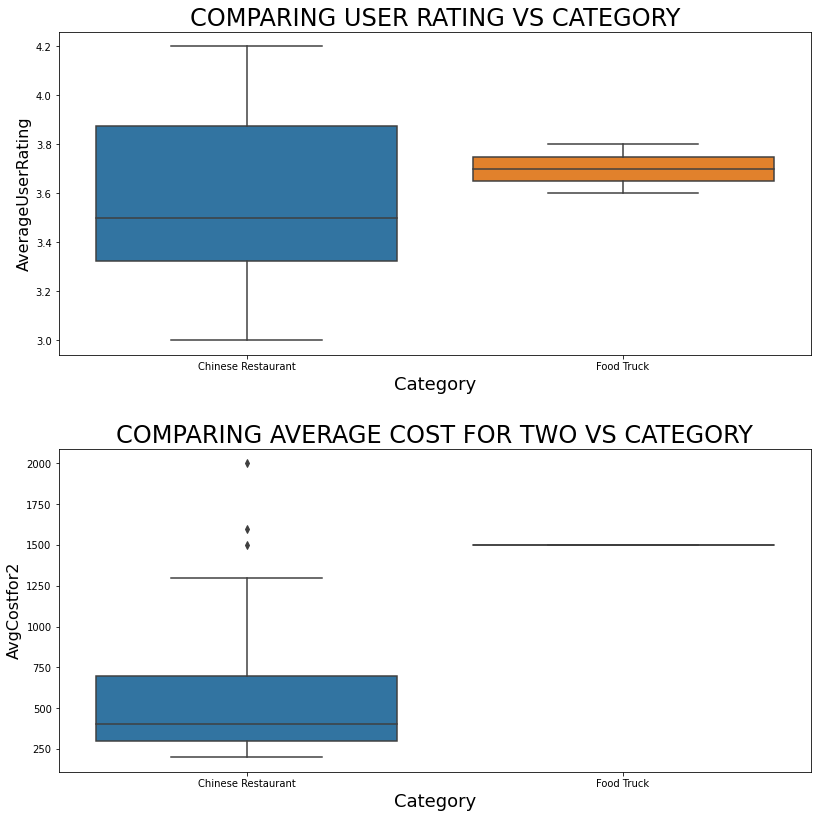

In [167]:
fig =plt.figure(1, figsize=(12, 12))
plt.subplot(2,1,1)
ax=sns.boxplot(x=DataMerged['Category'].loc[DataMerged['Bool'] == True], y="AverageUserRating", data=DataMerged);
ax.set_xlabel('Category', fontsize=18)
ax.set_ylabel('AverageUserRating', fontsize=16)
ax.set_title('COMPARING USER RATING VS CATEGORY',fontsize=24)
plt.subplot(2,1,2)
ax1=sns.boxplot(x=DataMerged['Category'].loc[DataMerged['Bool'] == True], y="AvgCostfor2", data=DataMerged);
ax1.set_xlabel('Category', fontsize=18)
ax1.set_ylabel('AvgCostfor2', fontsize=16)
ax1.set_title('COMPARING AVERAGE COST FOR TWO VS CATEGORY',fontsize=24)
plt.subplot(2,1,2)
fig.tight_layout(pad=3.0)

# GROUPING BY CATEOGRY

In [149]:

DataMerged.groupby('Category')['AvgCostfor2','PriceRange','AverageUserRating'].mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,AvgCostfor2,PriceRange,AverageUserRating
Category,,,
Asian Restaurant,1500.000000,3.000000,4.000000
Bakery,300.000000,1.000000,3.500000
Bar,700.000000,2.000000,3.900000
Chinese Restaurant,652.777778,1.666667,3.561111
College Administrative Building,300.000000,1.000000,3.500000
College Cafeteria,600.000000,2.000000,4.000000
Food Truck,1500.000000,3.000000,3.700000
Indian Chinese Restaurant,400.000000,1.000000,3.700000
Indian Restaurant,400.000000,1.000000,4.000000


# SCALING THE DATA

In [150]:
scaler = preprocessing.MinMaxScaler()
minmax_scaled_df = scaler.fit_transform(DataTo)

In [170]:
kmeans = KMeans(n_clusters=4 ,random_state=0).fit(minmax_scaled_df)

In [171]:
DataMerged


,AvgCostfor2,PriceRange,AverageUserRating,name,location.lat,location.lng,Category,label,Bool
0,1500,3.0,4.1,The Chinese,28.630593,77.220618,Chinese Restaurant,1,True
1,1500,3.0,4.0,Fujiya Japanese n Chinese restaurant,28.623762,77.199564,Asian Restaurant,1,False
2,750,2.0,3.1,Chinese Bite,28.584280,77.191714,Chinese Restaurant,0,True
3,1900,3.0,4.2,"Chinese Garden, Yashwant Place",28.584106,77.191610,Restaurant,1,False
4,250,1.0,3.0,Chinese corner,28.642798,77.186733,Chinese Restaurant,0,True
5,1600,3.0,3.5,"Zen Chinese, Connaught Place",28.633658,77.219495,Chinese Restaurant,1,True
6,400,1.0,4.0,Soy So Chinese,28.600367,77.226541,Indian Restaurant,2,False
7,300,1.0,3.5,Chinese Hut,28.583872,77.243970,College Administrative Building,2,False
8,350,1.0,3.9,Pioneer - The Chinese Restaurant,28.634521,77.216965,Chinese Restaurant,0,True
9,300,1.0,3.2,Chinese Inn,28.649473,77.267306,Chinese Restaurant,0,True


# GROUPING BY LABEL AND NAMING EACH CATEGORY
1) 0--> HIGH USER RATING AND MEDIUM PRICE RANGE

2) 1--> HIGH PRICE RANGE AND HIGH USER RATING

3) 2--> LOW COST + LOW RATING

4) 3--> LOW COST + MEDIUM RATING

In [172]:
DataMerged['label']=kmeans.labels_
DataMerged.groupby('label')['AverageUserRating','AvgCostfor2','PriceRange'].mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,AverageUserRating,AvgCostfor2,PriceRange
label,,,
0,3.960000,1390.000000,3.000000
1,3.900000,1600.000000,3.000000
2,3.407692,369.230769,1.153846
3,3.766667,450.000000,1.333333


In [173]:
DataMerged.groupby(['Category','label'])['label'].count()

Category                         label
Asian Restaurant                 1         1
Bakery                           3         1
Bar                              3         1
Chinese Restaurant               0         5
                                 2        13
College Administrative Building  3         1
College Cafeteria                3         1
Food Truck                       1         2
Indian Chinese Restaurant        3         1
Indian Restaurant                3         1
Restaurant                       1         1
Name: label, dtype: int64

In [174]:
DataMerged

,AvgCostfor2,PriceRange,AverageUserRating,name,location.lat,location.lng,Category,label,Bool
0,1500,3.0,4.1,The Chinese,28.630593,77.220618,Chinese Restaurant,0,True
1,1500,3.0,4.0,Fujiya Japanese n Chinese restaurant,28.623762,77.199564,Asian Restaurant,1,False
2,750,2.0,3.1,Chinese Bite,28.584280,77.191714,Chinese Restaurant,2,True
3,1900,3.0,4.2,"Chinese Garden, Yashwant Place",28.584106,77.191610,Restaurant,1,False
4,250,1.0,3.0,Chinese corner,28.642798,77.186733,Chinese Restaurant,2,True
5,1600,3.0,3.5,"Zen Chinese, Connaught Place",28.633658,77.219495,Chinese Restaurant,0,True
6,400,1.0,4.0,Soy So Chinese,28.600367,77.226541,Indian Restaurant,3,False
7,300,1.0,3.5,Chinese Hut,28.583872,77.243970,College Administrative Building,3,False
8,350,1.0,3.9,Pioneer - The Chinese Restaurant,28.634521,77.216965,Chinese Restaurant,2,True
9,300,1.0,3.2,Chinese Inn,28.649473,77.267306,Chinese Restaurant,2,True


In [175]:
DataMerged.drop(['Bool'],axis=1,inplace=True)

In [179]:
import matplotlib.cm as cm
import matplotlib.colors as colors
x = np.arange(3)
ys = [i + x + (i*x)**2 for i in range(4)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
rainbow

['#8000ff', '#2adddd', '#d4dd80', '#ff0000']

# MAPPING OUT ACCORDING TO CLUSTERS

In [180]:

map_Delhi1 = folium.Map(location=[lat,lng], zoom_start=11)
for lat, lng, name,label in zip(DataMerged['location.lat'], DataMerged['location.lng'], DataMerged['name'],DataMerged['label']):
    label1 = folium.Popup(str(name) + ' Cluster ' + str(label), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label1,
        color=rainbow[label-1],
        fill=True,      
        fill_opacity=1,
        parse_html=False).add_to(map_Delhi1)  
   
   
    
map_Delhi1

In [185]:
DataMerged.groupby(['label']).count()

,AvgCostfor2,PriceRange,AverageUserRating,name,location.lat,location.lng,Category
label,,,,,,,
0,5,5,5,5,5,5,5
1,4,4,4,4,4,4,4
2,13,13,13,13,13,13,13
3,6,6,6,6,6,6,6
